In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [426]:
from sklearn.model_selection import train_test_split
from sklearn.impute import  SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [427]:
from function import load_dataset, load_csv,split_train_test

In [428]:
load_dataset()
data = load_csv()

In [429]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [430]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [431]:
data = data.astype({'ocean_proximity':'category'})

In [432]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [433]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


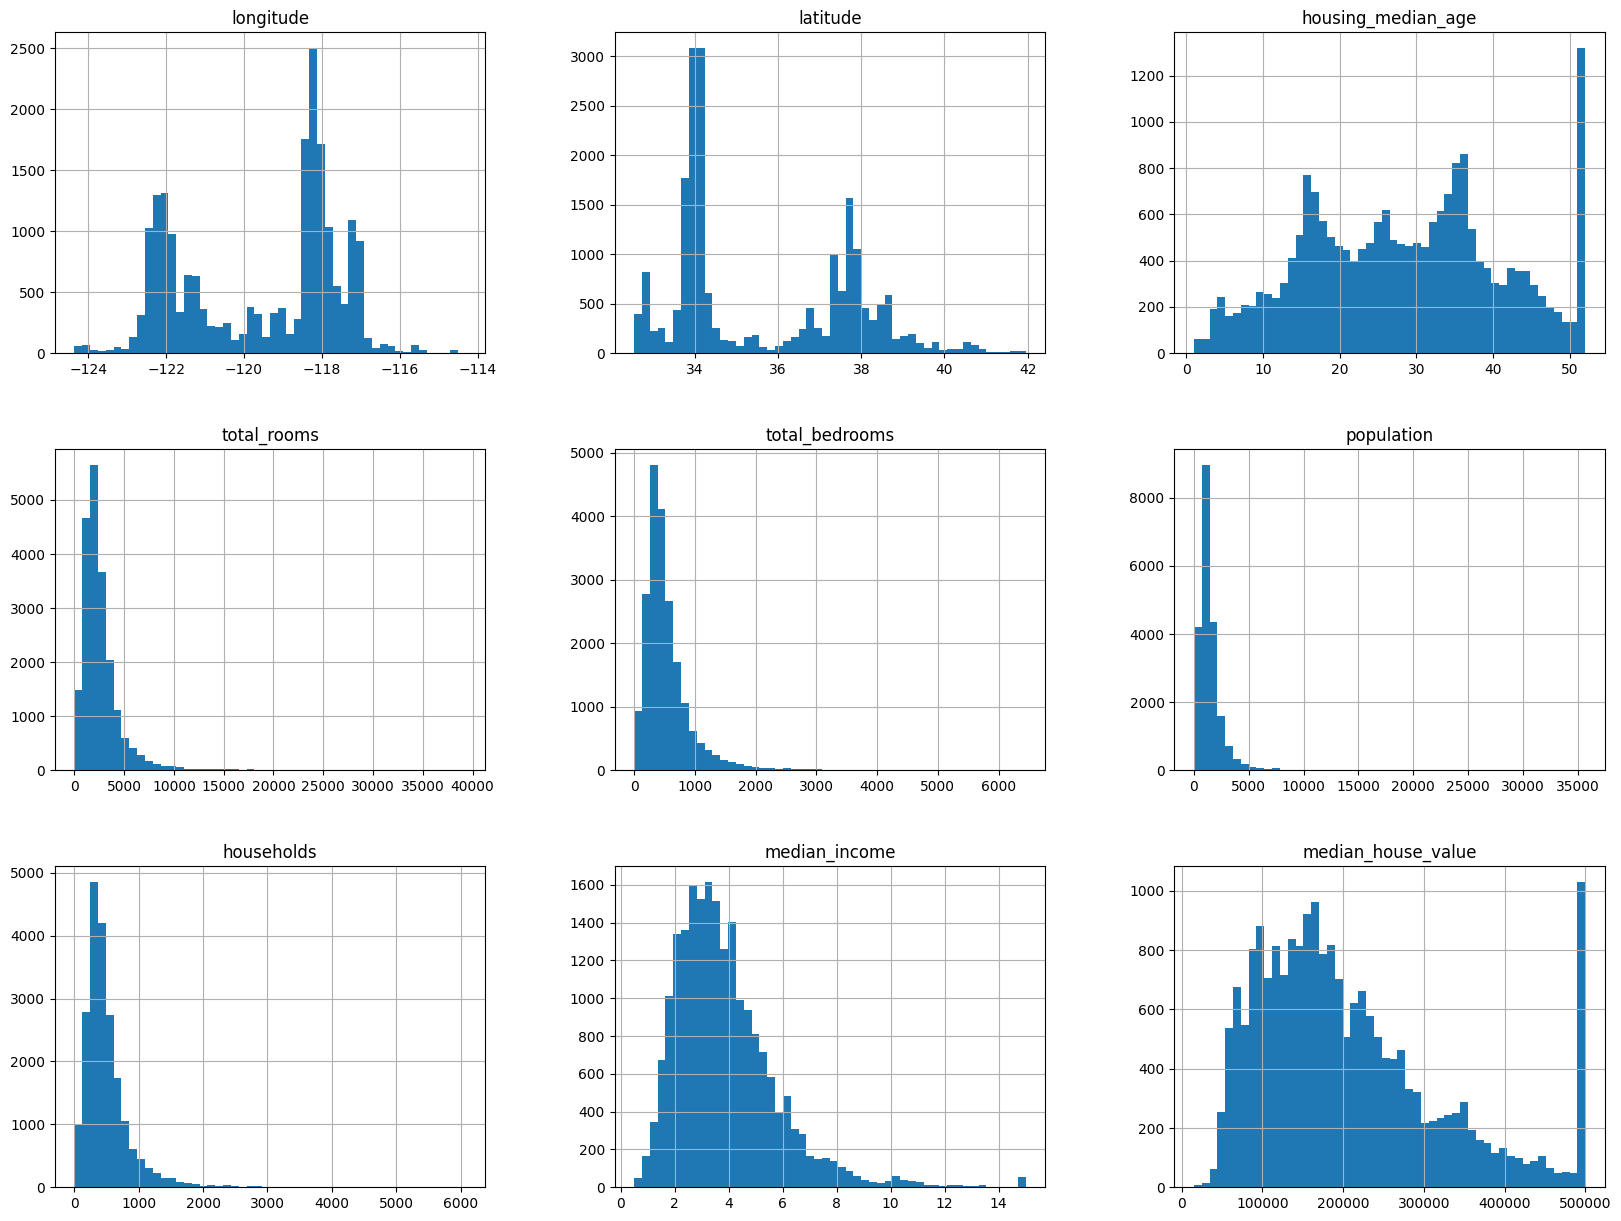

In [434]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

In [435]:
data['median_income']=data['median_income']*10000 #1=10000

In [436]:
data.duplicated().sum()

0

In [437]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [438]:
data[data['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,43750.0,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,16196.0,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,25762.0,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,49489.0,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,39063.0,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,33409.0,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,16953.0,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,51033.0,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,66073.0,258100.0,<1H OCEAN


In [439]:
data = data.dropna(subset='total_bedrooms')

In [440]:
train,test = split_train_test(data,0.2)

In [441]:
train_data, test_data = train_test_split(data, test_size=0.2,random_state=42)

<Axes: >

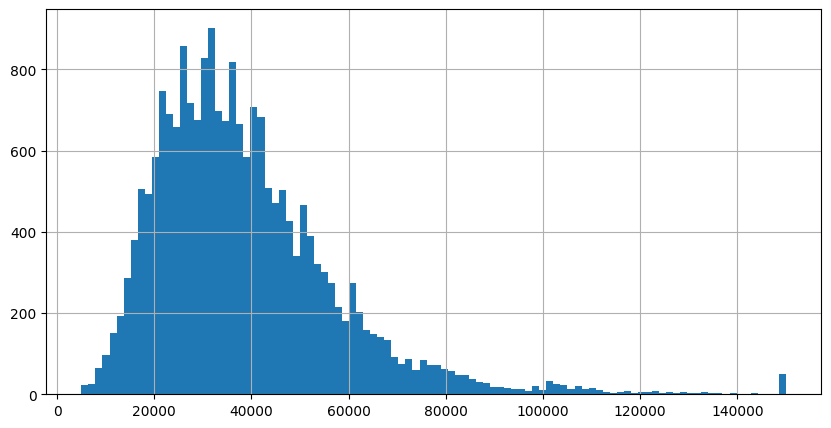

In [442]:
data['median_income'].hist(bins=100, figsize=(10,5))

In [443]:
data['median_income'].describe()

count     20433.000000
mean      38711.616013
std       18992.912493
min        4999.000000
25%       25637.000000
50%       35365.000000
75%       47440.000000
max      150001.000000
Name: median_income, dtype: float64

In [444]:
data['income_cut']=pd.cut(data['median_income'],bins=[0,15000,30000,45000,60000,np.inf], labels=[1,2,3,4,5])

<Axes: >

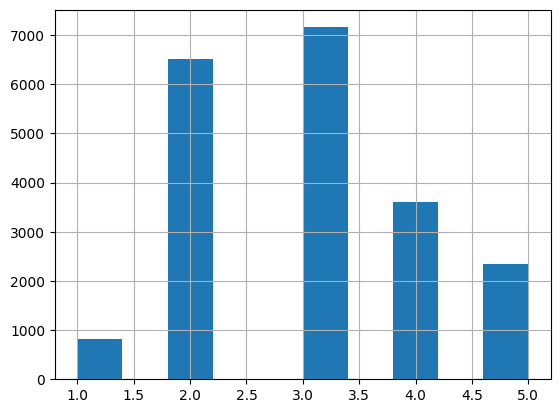

In [445]:
data['income_cut'].hist()

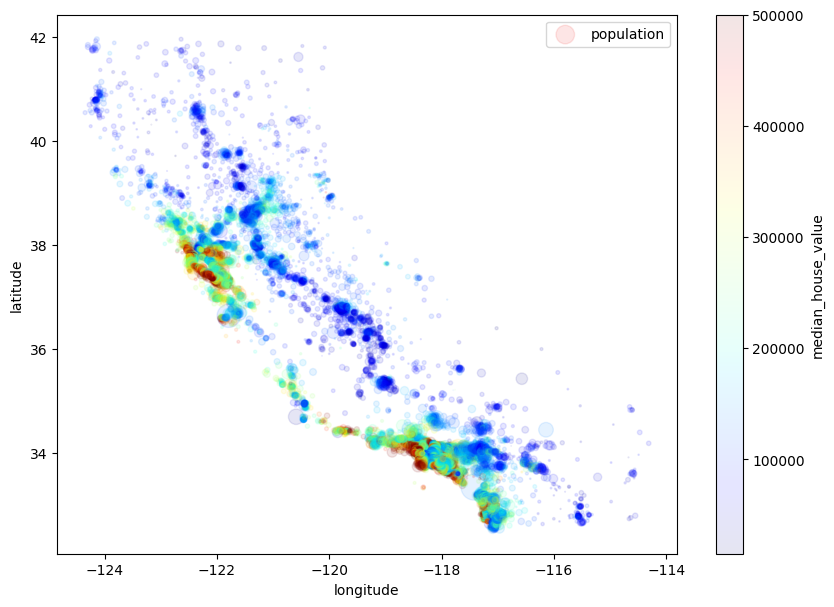

In [446]:
data.plot(kind='scatter', 
        x='longitude',
        y='latitude', 
        alpha=0.1, 
        s=data['population']/100,
        label='population', 
        figsize=(10,7), 
        c='median_house_value', 
        cmap=plt.get_cmap('jet'),
        colorbar=True)
plt.legend();

In [447]:
data.loc[:, ~data.columns.isin(['ocean_proximity'])].corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
income_cut            0.643941
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64

In [448]:
#pd.plotting.scatter_matrix(data.loc[:, ~data.columns.isin(['ocean_proximity'])], figsize=(50,50));

<Axes: xlabel='median_income', ylabel='median_house_value'>

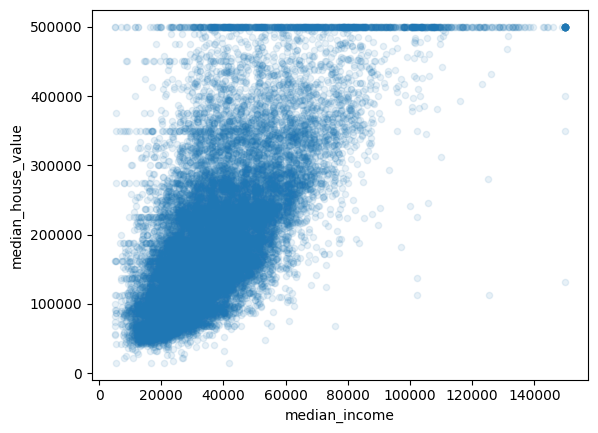

In [449]:
data.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [450]:
data['rooms_per_household'] = data['total_rooms']/data['households']
data['bedrooms_per_room'] = data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population']/data['households']

In [451]:
train_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [452]:
test_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [453]:
train_num = train_data.drop('ocean_proximity', axis=1)

In [454]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(train_num)

SimpleImputer()

In [455]:
imputer.statistics_

array([-1.19580513e+02,  3.56405689e+01,  2.86150128e+01,  2.62629347e+03,
        5.36057751e+02,  1.42058999e+03,  4.97613483e+02,  3.87069684e+04,
        2.06644400e+05])

In [456]:
train_num.median().values

array([-1.18510e+02,  3.42600e+01,  2.90000e+01,  2.12500e+03,
        4.34000e+02,  1.16500e+03,  4.08000e+02,  3.53665e+04,
        1.80100e+05])

In [457]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14416,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,31838.0,245800.0,NEAR OCEAN
16383,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,44871.0,137900.0,INLAND
7731,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,32237.0,218200.0,<1H OCEAN
1410,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,28920.0,220800.0,NEAR BAY
1335,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,41016.0,170500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
8291,-118.15,33.76,36.0,2916.0,785.0,1183.0,749.0,35985.0,500001.0,NEAR OCEAN
6274,-117.95,34.03,33.0,1782.0,394.0,1517.0,376.0,33389.0,157900.0,<1H OCEAN
2997,-119.03,35.32,12.0,2721.0,549.0,1294.0,523.0,25575.0,100200.0,INLAND
13440,-117.42,34.08,28.0,2300.0,419.0,1312.0,444.0,34844.0,127700.0,INLAND


In [458]:
test_data = test_data.dropna(subset='total_bedrooms')

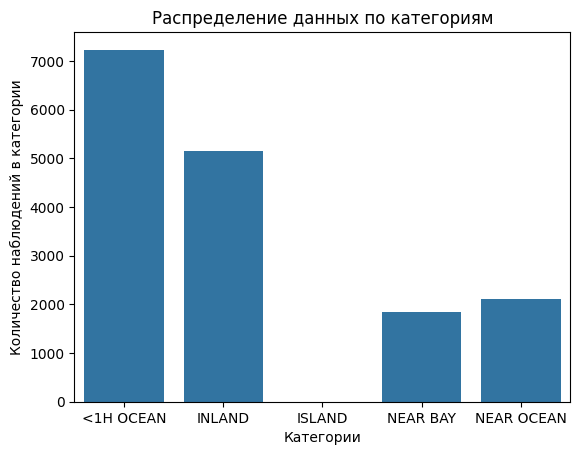

In [459]:
score_counts = train_data.ocean_proximity.value_counts()
sns.barplot(x = score_counts.index, y = score_counts.values)
plt.title('Распределение данных по категориям')
plt.ylabel('Количество наблюдений в категории')
plt.xlabel('Категории');

In [460]:
categorical_data = train_data['ocean_proximity']
categorical_data.shape

(16346,)

In [461]:
categorical_data = categorical_data.values.reshape(-1, 1)

In [462]:
categorical_data

[['<1H OCEAN'], ['INLAND'], ['INLAND'], ['<1H OCEAN'], ['NEAR OCEAN'], ..., ['<1H OCEAN'], ['<1H OCEAN'], ['<1H OCEAN'], ['NEAR BAY'], ['NEAR BAY']]
Length: 16346
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [463]:
ordinal_encoded = OneHotEncoder()
categorical_data_encoded = ordinal_encoded.fit_transform(categorical_data)

In [464]:
len(categorical_data_encoded.toarray())

16346

In [465]:
train_data['ocean_proximity']=categorical_data_encoded.toarray().tolist()

In [466]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,47027.0,227600.0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,34107.0,110400.0,"[0.0, 1.0, 0.0, 0.0, 0.0]"
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,36639.0,248100.0,"[0.0, 1.0, 0.0, 0.0, 0.0]"
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,22364.0,305600.0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,35500.0,214600.0,"[0.0, 0.0, 0.0, 0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,54286.0,273400.0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,47965.0,160800.0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,30990.0,335400.0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,52879.0,231200.0,"[0.0, 0.0, 0.0, 1.0, 0.0]"


In [467]:
data = pd.get_dummies(data, columns = ['ocean_proximity',], drop_first=True)

In [468]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cut,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,5,6.984127,0.146591,2.555556,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,5,6.238137,0.155797,2.109842,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,5,8.288136,0.129516,2.802260,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,4,5.817352,0.184458,2.547945,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,3,6.281853,0.172096,2.181467,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,15603.0,78100.0,2,5.045455,0.224625,2.560606,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,25568.0,77100.0,2,6.114035,0.215208,3.122807,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,17000.0,92300.0,2,5.205543,0.215173,2.325635,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,18672.0,84700.0,2,5.329513,0.219892,2.123209,True,False,False,False


In [469]:
pipeline = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scale', StandardScaler())
    ]
)

In [470]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cut,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,5,6.984127,0.146591,2.555556,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,5,6.238137,0.155797,2.109842,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,5,8.288136,0.129516,2.802260,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,4,5.817352,0.184458,2.547945,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,3,6.281853,0.172096,2.181467,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,15603.0,78100.0,2,5.045455,0.224625,2.560606,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,25568.0,77100.0,2,6.114035,0.215208,3.122807,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,17000.0,92300.0,2,5.205543,0.215173,2.325635,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,18672.0,84700.0,2,5.329513,0.219892,2.123209,True,False,False,False


In [471]:
y = data['median_income']
X = data.drop(columns=['median_income','income_cut'], axis=1)

In [472]:
X_tarin, X_test, y_tarin, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [473]:
scale = StandardScaler()
X_tarin = scale.fit_transform(X_tarin)
X_test = scale.transform(X_test)

In [474]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_tarin, y_tarin)
prediction = lin_reg.predict(X_test)
result = mean_absolute_error(y_test, prediction)**0.5

In [475]:
result

82.60830556169148

In [476]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_tarin, y_tarin)
prediction = model.predict(X_test)
result = mean_absolute_error(y_test, prediction)**0.5

In [477]:
result

86.72325481871542

In [478]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_tarin, y_tarin)
prediction = model.predict(X_test)
result = mean_absolute_error(y_test, prediction)**0.5

In [479]:
result

73.08215721337601

array([[-1.10651441,  0.78620804, -1.16206244, ..., -0.01354861,
        -0.35636982, -0.38540693],
       [-0.02467137,  0.46787317,  0.34865716, ..., -0.01354861,
        -0.35636982, -0.38540693],
       [ 0.75804456, -0.71183841, -0.2874353 , ..., -0.01354861,
        -0.35636982, -0.38540693],
       ...,
       [ 0.5785683 , -0.76333376,  1.06426118, ..., -0.01354861,
        -0.35636982, -0.38540693],
       [-1.22616525,  0.90324292, -1.32108555, ..., -0.01354861,
         2.80607376, -0.38540693],
       [-1.42059787,  0.97814524,  1.85937675, ..., -0.01354861,
         2.80607376, -0.38540693]])